<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy
import pandas as pd
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [18]:

x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [19]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:

# crea el modelo
model = Sequential()
model.add(Dense(50, input_dim=8, kernel_initializer='normal', activation='relu'))


In [26]:

# Compila el modelo
model.compile(loss='mean_squared_error', optimizer='adam')



In [27]:
# Ajusta el modelo
# Ajusta el modelo
model.fit(x_train, y_train, epochs=50, batch_size=30)

Epoch 1/50
277/277 [==============================] - 1s 1ms/step - loss: 219.2877
Epoch 2/50
277/277 [==============================] - 0s 1ms/step - loss: 155.4890
Epoch 3/50
277/277 [==============================] - 0s 1ms/step - loss: 148.6550
Epoch 4/50
277/277 [==============================] - 0s 1ms/step - loss: 148.1178
Epoch 5/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0966
Epoch 6/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0941
Epoch 7/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0909
Epoch 8/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0892
Epoch 9/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0848
Epoch 10/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0809
Epoch 11/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0802
Epoch 12/50
277/277 [==============================] - 0s 1ms/step - loss: 148.0776
E

In [29]:
# Introducing the stars
import tensorflow as tf
from tensorflow import keras

In [109]:
def define_model():
    
    model = keras.models.Sequential()

    # Input layer
    model.add(keras.layers.Flatten(input_dim=8))
    

    # Two hidden layers with 32 units each
    model.add(keras.layers.Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(12, kernel_initializer='normal', activation='relu'))

    # Output layer. As this is a multi-class classification problem, use K (here 10) units.
    model.add(keras.layers.Dense(1, input_dim=8, kernel_initializer='normal', activation='relu'))

    
    return model

model = define_model()



In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [110]:
early = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss',
                                      restore_best_weights=True)

In [111]:
# To start from scratch
keras.backend.clear_session()

model = define_model()
model.compile(loss='mse', metrics=['mse', 'mae'], optimizer='adam')

In [126]:

history = model.fit(epochs=250, batch_size=30, x=x_train, y=y_train, validation_data=(x_test, y_test) )
#                     callbacks=[early,])

Epoch 1/250
277/277 [==============================] - 1s 2ms/step - loss: 0.6636 - mse: 0.6636 - mae: 0.6417 - val_loss: 0.6763 - val_mse: 0.6763 - val_mae: 0.6409
Epoch 2/250
277/277 [==============================] - 0s 2ms/step - loss: 0.6613 - mse: 0.6613 - mae: 0.6393 - val_loss: 0.7262 - val_mse: 0.7262 - val_mae: 0.6556
Epoch 3/250
277/277 [==============================] - 0s 2ms/step - loss: 0.6614 - mse: 0.6614 - mae: 0.6426 - val_loss: 0.6943 - val_mse: 0.6943 - val_mae: 0.6605
Epoch 4/250
277/277 [==============================] - 0s 2ms/step - loss: 0.6555 - mse: 0.6555 - mae: 0.6374 - val_loss: 0.7589 - val_mse: 0.7589 - val_mae: 0.6983
Epoch 5/250
277/277 [==============================] - 1s 2ms/step - loss: 0.6635 - mse: 0.6635 - mae: 0.6423 - val_loss: 0.7901 - val_mse: 0.7901 - val_mae: 0.6781
Epoch 6/250
277/277 [==============================] - 0s 2ms/step - loss: 0.6598 - mse: 0.6598 - mae: 0.6396 - val_loss: 0.7079 - val_mse: 0.7079 - val_mae: 0.6497
Epoch 7/25

In [113]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.10414 ],
       [26.956785],
       [14.304055],
       ...,
       [33.98825 ],
       [27.48458 ],
       [29.01253 ]], dtype=float32)

In [114]:
early = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss',
                                      restore_best_weights=True)

In [115]:
# To start from scratch
keras.backend.clear_session()

model = define_model()
model.compile(loss='mse', metrics=['mse', 'mae'], optimizer='adam')


In [131]:

history = model.fit(epochs=150, batch_size=30, x=x_train, y=y_train, validation_data=(x_test, y_test),
                    callbacks=[early,])

Epoch 1/150
277/277 [==============================] - 1s 2ms/step - loss: 0.6398 - mse: 0.6398 - mae: 0.6298 - val_loss: 0.6824 - val_mse: 0.6824 - val_mae: 0.6537
Epoch 2/150
277/277 [==============================] - 0s 2ms/step - loss: 0.6426 - mse: 0.6426 - mae: 0.6304 - val_loss: 0.6966 - val_mse: 0.6966 - val_mae: 0.6618
Epoch 3/150
277/277 [==============================] - 0s 2ms/step - loss: 0.6413 - mse: 0.6413 - mae: 0.6301 - val_loss: 0.6553 - val_mse: 0.6553 - val_mae: 0.6342
Epoch 4/150
277/277 [==============================] - 0s 2ms/step - loss: 0.6340 - mse: 0.6340 - mae: 0.6285 - val_loss: 0.6701 - val_mse: 0.6701 - val_mae: 0.6468
Epoch 5/150
277/277 [==============================] - 0s 2ms/step - loss: 0.6387 - mse: 0.6387 - mae: 0.6279 - val_loss: 0.6621 - val_mse: 0.6621 - val_mae: 0.6413
Epoch 6/150
277/277 [==============================] - 0s 2ms/step - loss: 0.6479 - mse: 0.6479 - mae: 0.6336 - val_loss: 0.7183 - val_mse: 0.7183 - val_mae: 0.6735
Epoch 7/15

In [134]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.481165],
       [26.989988],
       [14.666917],
       ...,
       [33.960136],
       [27.637766],
       [28.948885]], dtype=float32)

In [135]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= False)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.8010136728115609


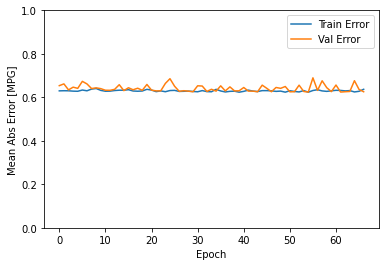

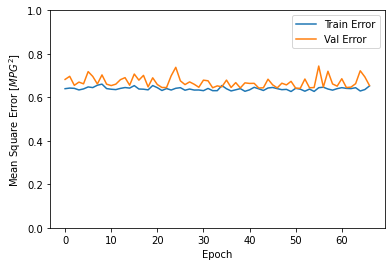

In [136]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)